#                                                  BBL Match Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
match_data = pd.read_csv('C:/Users/Ashwani/Desktop/TechJam/AustraliaProject/match.csv')
ball_data = pd.read_csv('C:/Users/Ashwani/Desktop/TechJam/AustraliaProject/ball.csv')

In [6]:
match_data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,524915,Sydney,2011-12-16,BJ Haddin,Sydney Cricket Ground,0,Sydney Sixers,Brisbane Heat,Brisbane Heat,bat,Sydney Sixers,wickets,7.0,N,NaN,BNJ Oxenford,PR Reiffel
1,524916,Melbourne,2011-12-17,DA Warner,Melbourne Cricket Ground,0,Melbourne Stars,Sydney Thunder,Sydney Thunder,field,Sydney Thunder,wickets,6.0,N,NaN,SD Fry,P Wilson
2,524917,Adelaide,2011-12-18,M Klinger,Adelaide Oval,0,Adelaide Strikers,Melbourne Renegades,Melbourne Renegades,field,Adelaide Strikers,runs,67.0,N,NaN,AJ Barrow,BNJ Oxenford
3,524918,Perth,2011-12-18,BW Hilfenhaus,Western Australia Cricket Association Ground,0,Perth Scorchers,Hobart Hurricanes,Hobart Hurricanes,bat,Hobart Hurricanes,runs,31.0,N,NaN,GA Abood,AP Ward
4,524919,Brisbane,2011-12-20,RJ Quiney,"Brisbane Cricket Ground, Woolloongabba",0,Brisbane Heat,Melbourne Stars,Melbourne Stars,bat,Melbourne Stars,runs,8.0,N,NaN,IH Lock,PR Reiffel


In [7]:
ball_data.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,524915,1,12,4,DT Christian,AW Robinson,SPD Smith,1,0,1,0,0,NaN,NaN,NaN,NaN,Brisbane Heat,Sydney Sixers
1,524915,1,12,5,AW Robinson,DT Christian,SPD Smith,0,2,2,0,0,NaN,NaN,NaN,legbyes,Brisbane Heat,Sydney Sixers
2,524915,1,12,6,AW Robinson,DT Christian,SPD Smith,1,0,1,0,0,NaN,NaN,NaN,NaN,Brisbane Heat,Sydney Sixers
3,524915,1,13,1,AW Robinson,DT Christian,DJ Bravo,4,0,4,0,0,NaN,NaN,NaN,NaN,Brisbane Heat,Sydney Sixers
4,524915,1,13,2,AW Robinson,DT Christian,DJ Bravo,1,0,1,0,0,NaN,NaN,NaN,NaN,Brisbane Heat,Sydney Sixers


In [8]:
match_data.isnull().sum()

id                   0
city                 0
date                 0
player_of_match      6
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               6
result               6
result_margin       10
eliminator           6
method             392
umpire1              0
umpire2              0
dtype: int64

In [9]:
ball_data.isnull().sum()

id                      0
inning                  0
over                    0
ball                    0
batsman                 0
non_striker             0
bowler                  0
batsman_runs            0
extra_runs              0
total_runs              0
non_boundary            0
is_wicket               0
dismissal_kind      77456
player_dismissed    77456
fielder             78695
extras_type         77557
batting_team            0
bowling_team           78
dtype: int64

In [10]:
ball_data.shape

(81698, 18)

In [12]:
match_data.shape

(414, 17)

In [13]:
match_data.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2'],
      dtype='object')

In [14]:
ball_data.columns

Index(['id', 'inning', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
       'batsman_runs', 'extra_runs', 'total_runs', 'non_boundary', 'is_wicket',
       'dismissal_kind', 'player_dismissed', 'fielder', 'extras_type',
       'batting_team', 'bowling_team'],
      dtype='object')

In [15]:
print('Matches played so far:', match_data.shape[0])
print('\n Cities played at:', match_data['city'].unique())
print('\n Teams participated:', match_data['team1'].unique())

Matches played so far: 414

 Cities played at: ['Sydney' 'Melbourne' 'Adelaide' 'Perth' 'Brisbane' 'Hobart' 'Canberra'
 'Launceston' 'Geelong' 'Alice Springs' 'Carrara' 'Moe' 'Coffs Harbour']

 Teams participated: ['Sydney Sixers' 'Melbourne Stars' 'Adelaide Strikers' 'Perth Scorchers'
 'Brisbane Heat' 'Hobart Hurricanes' 'Melbourne Renegades'
 'Sydney Thunder']


In [16]:
match_data['Season'] = pd.DatetimeIndex(match_data['date']).year
match_data.head()


,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,Season
0,524915,Sydney,2011-12-16,BJ Haddin,Sydney Cricket Ground,0,Sydney Sixers,Brisbane Heat,Brisbane Heat,bat,Sydney Sixers,wickets,7.0,N,NaN,BNJ Oxenford,PR Reiffel,2011
1,524916,Melbourne,2011-12-17,DA Warner,Melbourne Cricket Ground,0,Melbourne Stars,Sydney Thunder,Sydney Thunder,field,Sydney Thunder,wickets,6.0,N,NaN,SD Fry,P Wilson,2011
2,524917,Adelaide,2011-12-18,M Klinger,Adelaide Oval,0,Adelaide Strikers,Melbourne Renegades,Melbourne Renegades,field,Adelaide Strikers,runs,67.0,N,NaN,AJ Barrow,BNJ Oxenford,2011
3,524918,Perth,2011-12-18,BW Hilfenhaus,Western Australia Cricket Association Ground,0,Perth Scorchers,Hobart Hurricanes,Hobart Hurricanes,bat,Hobart Hurricanes,runs,31.0,N,NaN,GA Abood,AP Ward,2011
4,524919,Brisbane,2011-12-20,RJ Quiney,"Brisbane Cricket Ground, Woolloongabba",0,Brisbane Heat,Melbourne Stars,Melbourne Stars,bat,Melbourne Stars,runs,8.0,N,NaN,IH Lock,PR Reiffel,2011


In [17]:
match_per_season = match_data.groupby(['Season'])['id'].count().reset_index().rename(columns={'id':'matches'})
match_per_season

,Season,matches
0,2011,12
1,2012,34
2,2013,18
3,2014,37
4,2015,34
5,2016,31
6,2017,36
7,2018,45
8,2019,62
9,2020,65


C:\Users\Ashwani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Total matches played in each season')

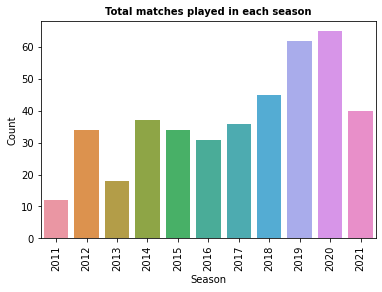

In [18]:
sns.countplot(match_data['Season'])
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Season', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Total matches played in each season', fontsize = 10, fontweight = "bold")

In [19]:
season_data=match_data[['id','Season']].merge(ball_data, left_on = 'id', right_on = 'id', how = 'left').drop('id', axis = 1)
season_data.head()

,Season,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,2011,1.0,12.0,4.0,DT Christian,AW Robinson,SPD Smith,1.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,Brisbane Heat,Sydney Sixers
1,2011,1.0,12.0,5.0,AW Robinson,DT Christian,SPD Smith,0.0,2.0,2.0,0.0,0.0,NaN,NaN,NaN,legbyes,Brisbane Heat,Sydney Sixers
2,2011,1.0,12.0,6.0,AW Robinson,DT Christian,SPD Smith,1.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,Brisbane Heat,Sydney Sixers
3,2011,1.0,13.0,1.0,AW Robinson,DT Christian,DJ Bravo,4.0,0.0,4.0,0.0,0.0,NaN,NaN,NaN,NaN,Brisbane Heat,Sydney Sixers
4,2011,1.0,13.0,2.0,AW Robinson,DT Christian,DJ Bravo,1.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,Brisbane Heat,Sydney Sixers


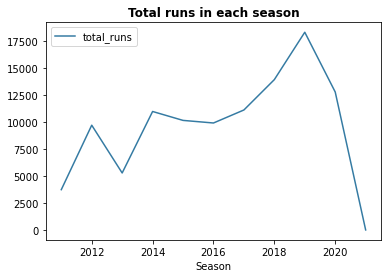

In [22]:
season=season_data.groupby(['Season'])['total_runs'].sum().reset_index()
p=season.set_index('Season')
ax = plt.axes()
ax.set(facecolor = "white")
sns.lineplot(data=p,palette="mako") 
plt.title('Total runs in each season',fontsize=12,fontweight="bold")
plt.show()

In [23]:
runs_per_season=pd.concat([match_per_season,season.iloc[:,1]],axis=1)
runs_per_season['Runs scored per match']=runs_per_season['total_runs']/runs_per_season['matches']
runs_per_season.set_index('Season',inplace=True)
runs_per_season

,matches,total_runs,Runs scored per match
Season,,,
2011,12,3725.0,310.416667
2012,34,9691.0,285.029412
2013,18,5269.0,292.722222
2014,37,10960.0,296.216216
2015,34,10135.0,298.088235
2016,31,9895.0,319.193548
2017,36,11099.0,308.305556
2018,45,13910.0,309.111111
2019,62,18293.0,295.048387


# Toss Details

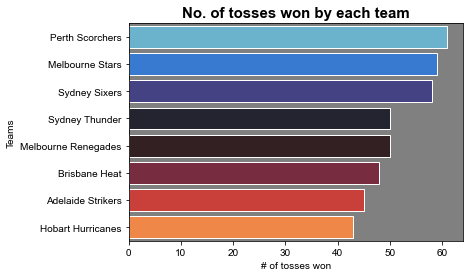

In [24]:
toss=match_data['toss_winner'].value_counts()
ax = plt.axes()
ax.set(facecolor = "grey")
sns.set(rc={'figure.figsize':(15,10)},style='darkgrid')
ax.set_title('No. of tosses won by each team',fontsize=15,fontweight="bold")
sns.barplot(y=toss.index, x=toss, orient='h',palette="icefire",saturation=1)
plt.xlabel('# of tosses won')
plt.ylabel('Teams')
plt.show()

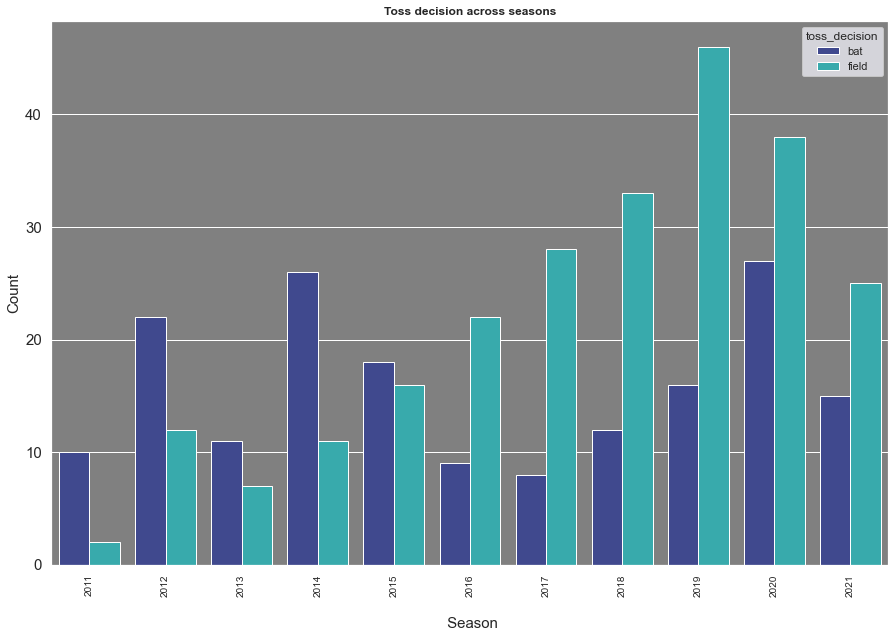

In [26]:
ax = plt.axes()
ax.set(facecolor = "grey")
sns.countplot(x='Season', hue='toss_decision', data=match_data,palette="mako",saturation=1)
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=15)
plt.xlabel('\n Season',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.title('Toss decision across seasons',fontsize=12,fontweight="bold")
plt.show()

# Match WIN%

In [27]:
match_data['result'].value_counts()

wickets    205
runs       199
tie          4
Name: result, dtype: int64

In [28]:
match_data.venue[match_data.result!='runs'].mode()

0    Melbourne Cricket Ground
dtype: object

In [29]:
match_data.venue[match_data.result!='wickets'].mode()

0    Adelaide Oval
dtype: object

In [30]:
match_data.winner[match_data.result!='runs'].mode()

0    Sydney Sixers
dtype: object

In [31]:
match_data.winner[match_data.result!='wickets'].mode()

0    Perth Scorchers
dtype: object

C:\Users\Ashwani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


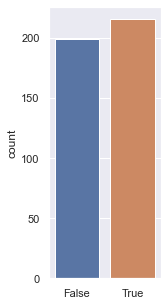

In [35]:
toss = match_data['toss_winner'] == match_data['winner']
plt.figure(figsize=(2,5))
sns.countplot(toss)
plt.show()

C:\Users\Ashwani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


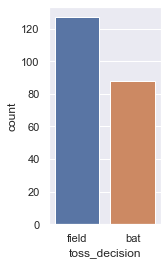

In [37]:
plt.figure(figsize=(2,4))
sns.countplot(match_data.toss_decision[match_data.toss_winner == match_data.winner])
plt.show()

# Best Player

In [38]:
runs = ball_data.groupby(['batsman'])['batsman_runs'].sum().reset_index()
runs.columns = ['Batsman', 'runs']
y = runs.sort_values(by='runs', ascending = False).head(10).reset_index().drop('index', axis=1)
y

,Batsman,runs
0,CA Lynn,2287
1,AJ Finch,2251
2,SE Marsh,1876
3,DJM Short,1764
4,MC Henriques,1743
5,M Klinger,1737
6,JW Wells,1726
7,MP Stoinis,1709
8,GJ Maxwell,1705
9,MS Wade,1694


Text(0.5, 1.0, 'Top 10 run scorers in IPL')

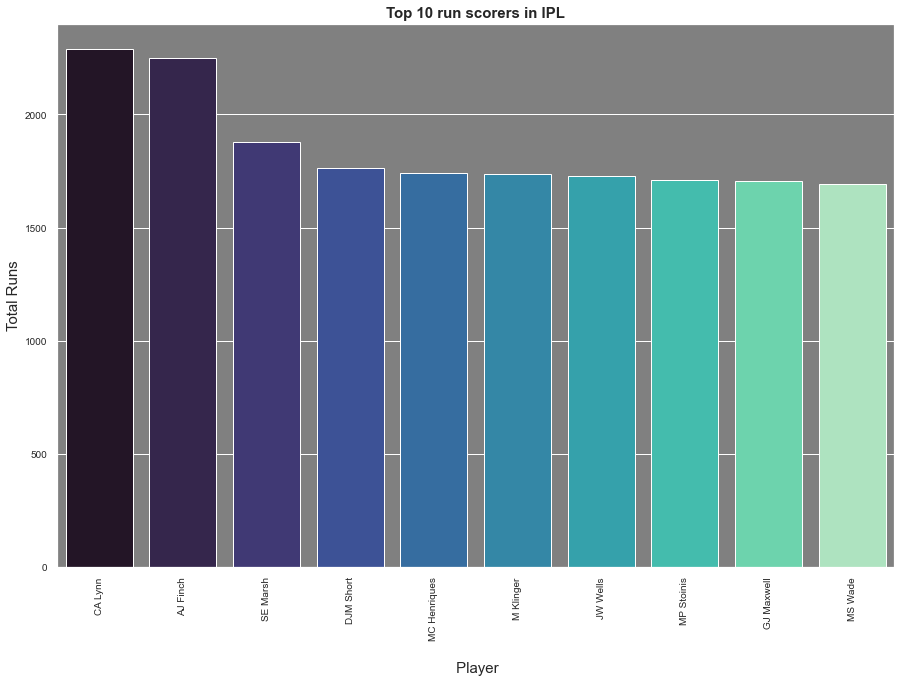

In [45]:
ax = plt.axes()
ax.set(facecolor = "grey")
sns.barplot(x=y['Batsman'],y=y['runs'],palette='mako',saturation=1)
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('\n Player',fontsize=15)
plt.ylabel('Total Runs',fontsize=15)
plt.title('Top 10 run scorers in IPL',fontsize=15,fontweight="bold")

In [39]:
player = (ball_data['batsman']=='CA Lynn')
df_lynn=ball_data[player]
df_lynn.head()


,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
93,524915,1,8,1,CA Lynn,ML Hayden,JR Hazlewood,0,0,0,0,0,NaN,NaN,NaN,NaN,Brisbane Heat,Sydney Sixers
94,524915,1,8,2,CA Lynn,ML Hayden,JR Hazlewood,2,0,2,0,0,NaN,NaN,NaN,NaN,Brisbane Heat,Sydney Sixers
95,524915,1,8,3,CA Lynn,ML Hayden,JR Hazlewood,0,0,0,0,1,caught,CA Lynn,MC Henriques,NaN,Brisbane Heat,Sydney Sixers
1145,524919,2,3,3,CA Lynn,BB McCullum,CJ McKay,0,0,0,0,0,NaN,NaN,NaN,NaN,Brisbane Heat,Melbourne Stars
1146,524919,2,3,4,CA Lynn,BB McCullum,CJ McKay,1,0,1,0,0,NaN,NaN,NaN,NaN,Brisbane Heat,Melbourne Stars


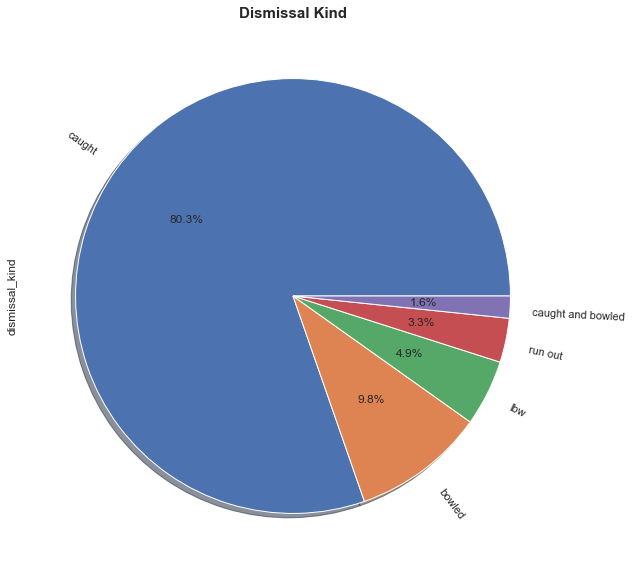

In [40]:
df_lynn['dismissal_kind'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,rotatelabels=True)
plt.title("Dismissal Kind",fontweight="bold",fontsize=15)
plt.show()

In [42]:
def count(df_lynn,runs):
    return len(df_lynn[df_lynn['batsman_runs']==runs])*runs

In [43]:
print("Runs scored from 1's :",count(df_lynn,1))
print("Runs scored from 2's :",count(df_lynn,2))
print("Runs scored from 3's :",count(df_lynn,3))
print("Runs scored from 4's :",count(df_lynn,4))
print("Runs scored from 6's :",count(df_lynn,6))

Runs scored from 1's : 521
Runs scored from 2's : 194
Runs scored from 3's : 24
Runs scored from 4's : 684
Runs scored from 6's : 864


Text(0.5, 1.0, 'Highest MOM award winners')

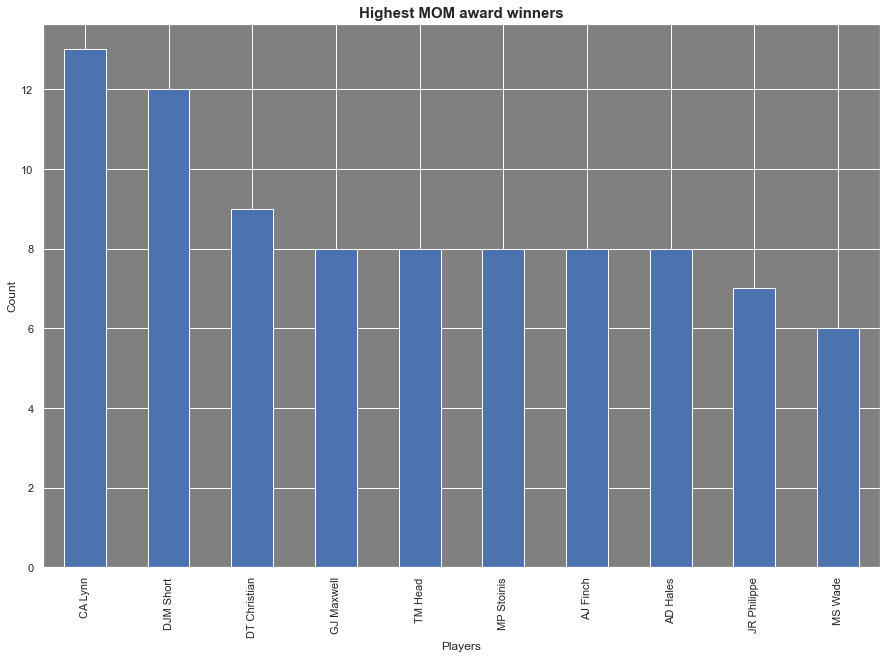

In [48]:
ax = plt.axes()
ax.set(facecolor = "grey")
match_data.player_of_match.value_counts()[:10].plot(kind='bar')
plt.xlabel('Players')
plt.ylabel("Count")
plt.title("Highest MOM award winners",fontsize=15,fontweight="bold")